In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
X = df.loc[:, ['Ground Temperature']].values
Y = df.loc[:, 'Chirps/Second'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
print('c:',lir.intercept_)
print('m:',lir.coef_)

c: -1.2082517340723093
m: [0.22353551]


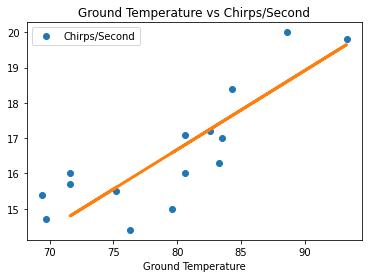

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
# plt.xlabel('Hours Studied')
# plt.ylabel('Percentage Score')

y=0.22353551*X_test-1.2082517340723093
plt.plot(X_test,y,linewidth=3)
plt.show()

# df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
# plt.title('Ground Temperature vs Chirps/Second')
# plt.plot(X_test,Y_pred,linewidth=3)
# plt.show()

In [ ]:
lir.score(X_test,Y_test)
#This equation is not a good fit for this data

0.6789448489590383

In [ ]:
#Extrapolate data
lir.predict(np.array([95]).reshape(1,-1))

array([20.02762153])

In [ ]:
#Intrapolate data
X = df.loc[:, ['Chirps/Second']].values
Y = df.loc[:, 'Ground Temperature'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


lr = LinearRegression() 
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

lr.predict(np.array([[18]]))

array([84.02970446])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
X = df.loc[:, ['Brain']].values
Y = df.loc[:, 'Body'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
print('c:',lir.intercept_)
print('m:',lir.coef_)

c: 12.653575661804325
m: [1.77924769]


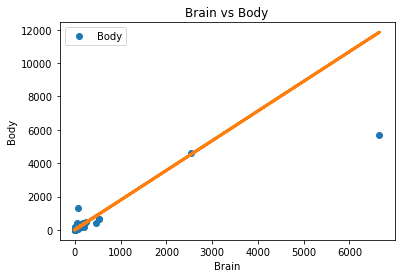

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')

y=1.77924769*X_test+12.653575661804325
plt.plot(X_test,y,linewidth=3)
plt.show()


In [ ]:
lir.score(X_test,Y_test)
#This equation is not a good fit for this data

-0.30357059429760946

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [9]:
X = df.iloc[:, :5].values
Y = df.loc[:, 'Salary'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
print('c:',lir.intercept_)
print('m:',lir.coef_)

c: 11191.982132815378
m: [1442.50065776 5087.00081432  257.94431355 -984.13173132   61.44730635]


In [11]:
lir.score(X_test,Y_test)

0.6322055127086071

In [13]:
X = df.iloc[:, [1,2,3]].values
Y = df.loc[:, 'Salary'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir1 = LinearRegression() 
lir1.fit(X_train, Y_train)
Y_pred = lir1.predict(X_test)

lir1.score(X_test,Y_test) #The columns Rank, Year and Degree helps to predict the target with the best R2 score

0.7708181666224372

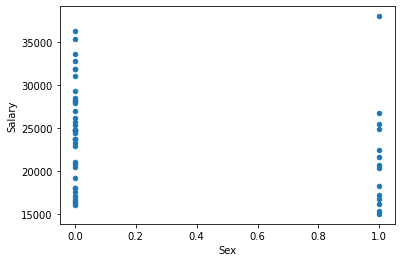

In [14]:
df.plot.scatter(x='Sex',y='Salary')
#Sex column does not contribute in predicting salary as it gives a low R2 score compared to the better one